In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
rom sklearn.linear_model import ElasticNet

from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

SyntaxError: invalid syntax (<ipython-input-84-d0b104a7fa48>, line 14)

# Data Preparation
First we ingested the Market Check Used Car Inventory data file containing used cars accross United States (~6.7 million instances with 38 features
Then we did initial data wraggling in SQLite and Alteryx (Removed columns with null values, single values, huge descriptive text values. Also instances with null values and 4 digit zipcodes

In [2]:
df = pd.read_csv('Desktop/GT/car_data_clean.csv')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,vin_ss,price_fs,miles_fs,stock_no_ss,year_is,make_ss,model_ss,trim_ss,vehicle_type_ss,...,dom_is,dom_180_is,msrp_fs,dom_active_is,is_certified_is,fuel_type_ss,scraped_at_dts,status_date_dts,city_ss,state_ss
0,00000433-1e18-46f5-befa-cb338ff4c44c,4T1BF1FK8CU553915,12997,68475,UCJ2478,2012,Toyota,Camry,L,Car,...,36,36,12997,36,0,Regular Unleaded,2018-08-22T16:25:51Z,2018-09-23T18:43:48Z,Pineville,MO
1,00000847-d723-47ed-9dd6-e1d70088e35a,1C4RJEJT9EC221337,25942,70897,P32069,2014,Jeep,Grand Cherokee,Summit,SUV,...,131,97,25942,97,0,Flex-Fuel,2018-08-29T20:41:30Z,2018-09-23T22:08:26Z,Houston,TX
2,00000d32-faef-4643-b0e1-b5d91ef47c6a,1HGCP3F85BA018516,10488,91599,H42760A,2011,Honda,Accord,EX-L V-6,Car,...,64,64,12578,64,0,Regular Unleaded,2018-09-20T07:11:32Z,2018-09-24T01:34:40Z,Norwood,MA
3,00000ff5-58ae-4ce0-9b41-651d9e85b478,1FTEW1CP8GFB91564,29997,44394,D190109A,2016,Ford,F-150,XLT,Truck,...,220,24,29997,24,0,Regular Unleaded,2018-09-02T04:11:09Z,2018-09-23T21:15:07Z,Murrieta,CA
4,0000120b-8653-495d-9c6e-b1d80996bed7,1FMEU17L63LA06903,4990,173058,3LA06903,2003,Ford,Expedition,Eddie Bauer,SUV,...,46,46,4990,46,0,Regular Unleaded,2018-08-09T11:12:42Z,2018-09-23T17:48:19Z,Raleigh,NC


In [4]:
print(df.shape)

(3509809, 30)


# Picked the top 10 cars by volume for further analysis

In [5]:
df_vol = df['make_ss'].value_counts()
df_vol_10 = df_vol.head(10).to_frame(name='makes')
print(df_vol_10.index)

Index(['Chevrolet', 'Ford', 'Toyota', 'Nissan', 'Honda', 'Jeep', 'Hyundai',
       'GMC', 'BMW', 'Lexus'],
      dtype='object')


In [6]:
df_top10 = df.loc[df['make_ss'].isin(df_vol_10.index)]
print(df_top10.head())

                                     id             vin_ss  price_fs  \
0  00000433-1e18-46f5-befa-cb338ff4c44c  4T1BF1FK8CU553915     12997   
1  00000847-d723-47ed-9dd6-e1d70088e35a  1C4RJEJT9EC221337     25942   
2  00000d32-faef-4643-b0e1-b5d91ef47c6a  1HGCP3F85BA018516     10488   
3  00000ff5-58ae-4ce0-9b41-651d9e85b478  1FTEW1CP8GFB91564     29997   
4  0000120b-8653-495d-9c6e-b1d80996bed7  1FMEU17L63LA06903      4990   

   miles_fs stock_no_ss  year_is make_ss        model_ss      trim_ss  \
0     68475     UCJ2478     2012  Toyota           Camry            L   
1     70897      P32069     2014    Jeep  Grand Cherokee       Summit   
2     91599     H42760A     2011   Honda          Accord     EX-L V-6   
3     44394    D190109A     2016    Ford           F-150          XLT   
4    173058    3LA06903     2003    Ford      Expedition  Eddie Bauer   

  vehicle_type_ss   ...    dom_is dom_180_is msrp_fs  dom_active_is  \
0             Car   ...        36         36   12997     

In [7]:
df_top10.shape

(2417454, 30)

In [8]:
df_top10.isnull().sum()

id                       0
vin_ss                   0
price_fs                 0
miles_fs                 0
stock_no_ss             14
year_is                  0
make_ss                  0
model_ss                 0
trim_ss                  0
vehicle_type_ss          0
body_type_ss             0
drivetrain_ss            0
engine_ss                0
engine_size_ss           0
transmission_ss          0
doors_is                 0
cylinders_is             0
interior_color_ss    76995
exterior_color_ss     8766
zip_is                   0
dom_is                   0
dom_180_is               0
msrp_fs                  0
dom_active_is            0
is_certified_is          0
fuel_type_ss             0
scraped_at_dts           0
status_date_dts          0
city_ss                  0
state_ss                 0
dtype: int64

In [9]:
df_top10 = df_top10.dropna()

In [10]:
df_top10.isnull().sum()

id                   0
vin_ss               0
price_fs             0
miles_fs             0
stock_no_ss          0
year_is              0
make_ss              0
model_ss             0
trim_ss              0
vehicle_type_ss      0
body_type_ss         0
drivetrain_ss        0
engine_ss            0
engine_size_ss       0
transmission_ss      0
doors_is             0
cylinders_is         0
interior_color_ss    0
exterior_color_ss    0
zip_is               0
dom_is               0
dom_180_is           0
msrp_fs              0
dom_active_is        0
is_certified_is      0
fuel_type_ss         0
scraped_at_dts       0
status_date_dts      0
city_ss              0
state_ss             0
dtype: int64

In [11]:
#Reading in the other datasets
county_demo = pd.read_csv('Desktop/GT/county_demos_cleaned.csv')
zip_county = pd.read_csv('Desktop/GT/zip_code_database_cleaned.csv')
age = pd.read_csv('Desktop/GT/year_age.csv')
region = pd.read_csv('Desktop/GT/regions_states.csv')

In [12]:
#Inner Join: County Demographic and Zip Datasets
df_countydemo_zip = pd.merge(zip_county, county_demo, how='inner', left_on=['county','state'], right_on=['County','State short'])

In [13]:
#Checking merge of previous cell
#df_countydemo_zip.tail
df_countydemo_zip.describe()

,zip,decommissioned,latitude,longitude,irs_estimated_population_2015,Rank,Population,Number of households
count,41366.000,41366.000,41366.000,41366.000,41366.000,41366.000,41366.000,41366.000
mean,49614.097,0.013,38.503,-90.924,6933.145,1194.811,529371.996,189446.994
std,27728.837,0.114,5.046,14.883,12044.291,889.859,1299847.762,436973.173
min,501.000,0.000,19.070,-176.630,0.000,1.000,71.000,33.000
25%,26278.500,0.000,35.030,-97.240,335.000,420.000,29399.000,11459.000
50%,48837.500,0.000,39.110,-87.890,1350.000,1029.500,102270.000,39545.500
75%,72931.500,0.000,41.850,-80.100,7420.000,1890.000,495326.000,184788.000
max,99927.000,1.000,68.090,-67.010,114420.000,3142.000,9893481.000,3230383.000


In [14]:
df_countydemo_zip.isnull().sum()

zip                              0
type                             0
decommissioned                   0
primary_city                     0
state                            0
county                           0
timezone                         0
latitude                         0
longitude                        0
irs_estimated_population_2015    0
county full                      0
Rank                             0
County                           0
State short                      0
Per Capita income                0
Median Household income          0
Median Family income             0
Population                       0
Number of households             0
State full                       0
dtype: int64

In [15]:
#Inner Join: Original Car Data and Age Datasets
df_top10 = pd.merge(df_top10, age, how='inner', left_on='year_is', right_on='YEAR')
df_top10.head()

,id,vin_ss,price_fs,miles_fs,stock_no_ss,year_is,make_ss,model_ss,trim_ss,vehicle_type_ss,...,msrp_fs,dom_active_is,is_certified_is,fuel_type_ss,scraped_at_dts,status_date_dts,city_ss,state_ss,YEAR,AGE
0,00000433-1e18-46f5-befa-cb338ff4c44c,4T1BF1FK8CU553915,12997,68475,UCJ2478,2012,Toyota,Camry,L,Car,...,12997,36,0,Regular Unleaded,2018-08-22T16:25:51Z,2018-09-23T18:43:48Z,Pineville,MO,2012,7
1,000088fe-58ea-40a0-b456-b48fd8b15bd7,1FAHP3K22CL161568,9590,57076,STA180597,2012,Ford,Focus,SE,Car,...,10337,37,0,Regular Unleaded,2018-09-10T23:34:24Z,2018-09-22T23:56:29Z,Pasco,WA,2012,7
2,00009307-877b-462c-876d-5b028c430743,4T1BF1FK1CU614036,12308,67943,B909618,2012,Toyota,Camry,L,Car,...,12308,4,0,Regular Unleaded,2018-09-15T22:07:29Z,2018-09-23T22:43:11Z,Augusta,GA,2012,7
3,00013abc-b294-4433-98a6-06c4b250b401,19XFB2F55CE074688,10388,56409,H3744C,2012,Honda,Civic,LX,Car,...,10388,25,0,Regular Unleaded,2018-09-02T01:43:41Z,2018-09-24T01:10:19Z,Owensboro,KY,2012,7
4,00026bf4-8360-44a8-af24-753be3e54fc4,JTDKN3DU2C5453956,12998,73965,39964-1,2012,Toyota,Prius,Three,Car,...,15000,87,0,Regular Unleaded,2018-07-12T17:47:39Z,2018-09-24T00:20:09Z,Columbia,SC,2012,7


In [16]:
df_top10.isnull().sum()

id                   0
vin_ss               0
price_fs             0
miles_fs             0
stock_no_ss          0
year_is              0
make_ss              0
model_ss             0
trim_ss              0
vehicle_type_ss      0
body_type_ss         0
drivetrain_ss        0
engine_ss            0
engine_size_ss       0
transmission_ss      0
doors_is             0
cylinders_is         0
interior_color_ss    0
exterior_color_ss    0
zip_is               0
dom_is               0
dom_180_is           0
msrp_fs              0
dom_active_is        0
is_certified_is      0
fuel_type_ss         0
scraped_at_dts       0
status_date_dts      0
city_ss              0
state_ss             0
YEAR                 0
AGE                  0
dtype: int64

In [17]:
#Inner Join: Countydemo_zip and Region Datasets
df_county_zip_region = pd.merge(df_countydemo_zip, region, how='inner', left_on='State short', right_on='States Short')
df_county_zip_region.head()

,zip,type,decommissioned,primary_city,state,county,timezone,latitude,longitude,irs_estimated_population_2015,...,State short,Per Capita income,Median Household income,Median Family income,Population,Number of households,State full,States Short,States,Regions
0,501,UNIQUE,0,Holtsville,NY,Suffolk,America/New_York,40.810,-73.040,562,...,NY,"$36,945.00","$87,763.00","$100,652.00",1495803,497347,New York,NY,New York,NorthEast
1,544,UNIQUE,0,Holtsville,NY,Suffolk,America/New_York,40.810,-73.040,0,...,NY,"$36,945.00","$87,763.00","$100,652.00",1495803,497347,New York,NY,New York,NorthEast
2,6390,PO BOX,0,Fishers Island,NY,Suffolk,America/New_York,41.270,-71.990,286,...,NY,"$36,945.00","$87,763.00","$100,652.00",1495803,497347,New York,NY,New York,NorthEast
3,11701,STANDARD,0,Amityville,NY,Suffolk,America/New_York,40.660,-73.410,25360,...,NY,"$36,945.00","$87,763.00","$100,652.00",1495803,497347,New York,NY,New York,NorthEast
4,11702,STANDARD,0,Babylon,NY,Suffolk,America/New_York,40.690,-73.320,13780,...,NY,"$36,945.00","$87,763.00","$100,652.00",1495803,497347,New York,NY,New York,NorthEast


In [18]:
#Checking merge of previous cell
df_county_zip_region.describe()
#df_county_zip_region.isnull().sum()

,zip,decommissioned,latitude,longitude,irs_estimated_population_2015,Rank,Population,Number of households
count,40819.000,40819.000,40819.000,40819.000,40819.000,40819.000,40819.000,40819.000
mean,49505.066,0.013,38.493,-90.613,6979.962,1203.628,530132.908,189489.138
std,27539.545,0.114,4.813,14.003,12058.691,887.184,1307983.337,439665.263
min,501.000,0.000,24.550,-124.630,0.000,1.000,87.000,33.000
25%,26664.500,0.000,35.030,-97.130,350.000,435.000,29376.000,11435.000
50%,48843.000,0.000,39.150,-87.910,1379.000,1039.000,100636.000,38654.000
75%,72667.000,0.000,41.850,-80.180,7530.000,1896.000,473832.000,179617.000
max,99403.000,1.000,49.310,-67.010,114420.000,3142.000,9893481.000,3230383.000


In [19]:
#Changing type in 'zip' column (type)
#df_car_age['zip_is'] = df_car_age['zip_is'].astype()
df_county_zip_region['zip'] = df_county_zip_region['zip'].astype(str)

In [20]:
#Inner Join: Final
df_top10 = pd.merge(df_top10, df_county_zip_region, how='inner', left_on='zip_is', right_on='zip')
df_top10.head

<bound method NDFrame.head of                                            id             vin_ss  price_fs  \
0        026454b9-8f7f-4200-8a22-15505442b297  1GNKVLED4CJ261435     16342   
1        07eaaaba-df00-4440-ad09-438a6ad2ec00  JTHBE5C20C5030562     21990   
2        09dafb80-659c-41f7-92a1-4933e7dcbb2c  4T4BF1FK3CR169613     13990   
3        09e6b3ab-d4aa-43a3-92db-8d18d37eac5c  JTEZU5JR9C5043244     21994   
4        0a0b266c-eaca-437c-b097-cb8111c4c264  WBAKE5C57CJ106116     13495   
5        0bb7c6b1-d9cd-4bd2-8ed5-3c61e4906246  1G1YV2DW7C5106668     38987   
6        10ef4184-ef78-4f1d-a16d-7f415532e6da  1GCHSDFEXC8143776     13866   
7        12db5fba-7543-491d-b651-b7acc129ee68  1C4PJMAK3CW120072     11325   
8        179dcb75-4ef9-42bd-997f-d346237df0d3  2HGFG3B16CH536515     11398   
9        18d1f72c-1400-4576-9d5d-47f43abebcc6  WBAUP7C59CVP22505     10990   
10       18fe647e-0bcb-4b63-a43d-5f54cce7d161  2GKFLREK9C6216316     12999   
11       197348da-0670-405a-9e07-8

In [21]:
df_top10.shape

(1175747, 55)

In [22]:
df_top10.isnull().sum()

id                               0
vin_ss                           0
price_fs                         0
miles_fs                         0
stock_no_ss                      0
year_is                          0
make_ss                          0
model_ss                         0
trim_ss                          0
vehicle_type_ss                  0
body_type_ss                     0
drivetrain_ss                    0
engine_ss                        0
engine_size_ss                   0
transmission_ss                  0
doors_is                         0
cylinders_is                     0
interior_color_ss                0
exterior_color_ss                0
zip_is                           0
dom_is                           0
dom_180_is                       0
msrp_fs                          0
dom_active_is                    0
is_certified_is                  0
fuel_type_ss                     0
scraped_at_dts                   0
status_date_dts                  0
city_ss             

In [23]:
df_top10.head()

,id,vin_ss,price_fs,miles_fs,stock_no_ss,year_is,make_ss,model_ss,trim_ss,vehicle_type_ss,...,State short,Per Capita income,Median Household income,Median Family income,Population,Number of households,State full,States Short,States,Regions
0,026454b9-8f7f-4200-8a22-15505442b297,1GNKVLED4CJ261435,16342,71233,P261435,2012,Chevrolet,Traverse,LTZ,SUV,...,MO,"$35,143.00","$67,721.00","$83,110.00",90842,36781,Missouri,MO,Missouri,MidWest
1,07eaaaba-df00-4440-ad09-438a6ad2ec00,JTHBE5C20C5030562,21990,44637,180770A,2012,Lexus,IS 350,Base,Car,...,MO,"$35,143.00","$67,721.00","$83,110.00",90842,36781,Missouri,MO,Missouri,MidWest
2,09dafb80-659c-41f7-92a1-4933e7dcbb2c,4T4BF1FK3CR169613,13990,86122,762911,2012,Toyota,Camry,L,Car,...,MO,"$35,143.00","$67,721.00","$83,110.00",90842,36781,Missouri,MO,Missouri,MidWest
3,09e6b3ab-d4aa-43a3-92db-8d18d37eac5c,JTEZU5JR9C5043244,21994,71624,3P1553A,2012,Toyota,4Runner,SR5,SUV,...,MO,"$35,143.00","$67,721.00","$83,110.00",90842,36781,Missouri,MO,Missouri,MidWest
4,0a0b266c-eaca-437c-b097-cb8111c4c264,WBAKE5C57CJ106116,13495,73000,XHC8610B,2012,BMW,3 Series,328i,Car,...,MO,"$35,143.00","$67,721.00","$83,110.00",90842,36781,Missouri,MO,Missouri,MidWest


In [24]:
df_top10 = df_top10[['price_fs', 'miles_fs', 'year_is', 'make_ss', 'model_ss', 'trim_ss', 
       'engine_size_ss',  'cylinders_is', 'interior_color_ss', 
       'exterior_color_ss', 'zip_is', 'msrp_fs', 'is_certified_is', 'fuel_type_ss', 'state_ss', 
                     'AGE', 'Regions', 'Population', 'Median Family income']]

In [25]:
df_top10.head()

,price_fs,miles_fs,year_is,make_ss,model_ss,trim_ss,engine_size_ss,cylinders_is,interior_color_ss,exterior_color_ss,zip_is,msrp_fs,is_certified_is,fuel_type_ss,state_ss,AGE,Regions,Population,Median Family income
0,16342,71233,2012,Chevrolet,Traverse,LTZ,3.600,6,Cashmere/ebony,Silver Ice Metallic,64153,16342,0,Regular Unleaded,MO,7,MidWest,90842,"$83,110.00"
1,21990,44637,2012,Lexus,IS 350,Base,3.500,6,Light Gray,Nebula Gray Pearl,64153,21990,1,Premium Unleaded,MO,7,MidWest,90842,"$83,110.00"
2,13990,86122,2012,Toyota,Camry,L,2.500,4,Ash,Attitude Black Metallic,64153,13990,0,Regular Unleaded,MO,7,MidWest,90842,"$83,110.00"
3,21994,71624,2012,Toyota,4Runner,SR5,4.000,6,Black/graphite,Classic Silver Metallic,64153,21994,0,Regular Unleaded,MO,7,MidWest,90842,"$83,110.00"
4,13495,73000,2012,BMW,3 Series,328i,3.000,6,Black,Alpine White,64153,13495,0,Premium Unleaded,MO,7,MidWest,90842,"$83,110.00"


# Data Cleansing
Removed duplicates 

In [26]:
dedups = df_top10.drop_duplicates(['price_fs', 'miles_fs', 'year_is', 'make_ss', 'model_ss', 'trim_ss', 
       'engine_size_ss',  'cylinders_is', 'interior_color_ss', 
       'exterior_color_ss', 'zip_is', 'msrp_fs', 'is_certified_is', 'fuel_type_ss', 'state_ss', 
                     'AGE', 'Regions', 'Population', 'Median Family income'])

In [27]:
print(dedups.shape)

(976619, 19)


In [28]:
expcars = (dedups['price_fs'] > 5000) & (dedups['price_fs'] < 50000) 

In [29]:
dedups = dedups[expcars]

In [30]:
print(dedups.shape)

(947417, 19)


# Data Visualization
Performed exploratory data analysis to better understand how data is distributed

Most Popular used car makes are Chevrolet and Ford

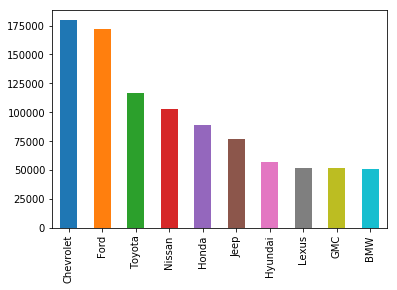

In [31]:
dedups['make_ss'].value_counts().plot(kind='bar')

Newer cars are more expensive than older cars. Expected.

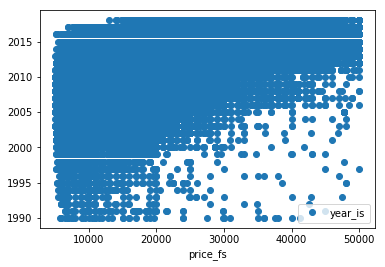

In [32]:
dedups.plot(x='price_fs', y='year_is', style='o')

Range and median prices per car type

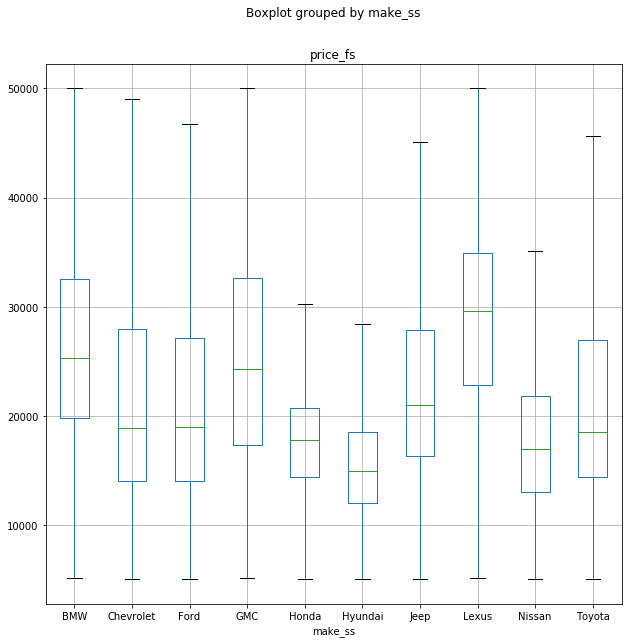

In [33]:
dedups.boxplot(column="price_fs", by="make_ss", figsize=(10,10), showfliers=False)

Distribution among the various categorical features

make_ss
Chevrolet    179394
Ford         172088
Toyota       116773
Nissan       102925
Honda         88506
Name: make_ss, dtype: int64


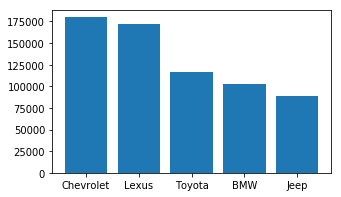

model_ss
F-150             45778
Silverado 1500    45290
Altima            26901
Equinox           26614
CR-V              26494
Name: model_ss, dtype: int64


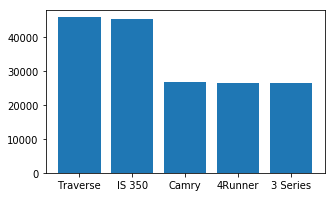

trim_ss
LT         85186
SE         80287
Base       70667
Limited    47798
S          31024
Name: trim_ss, dtype: int64


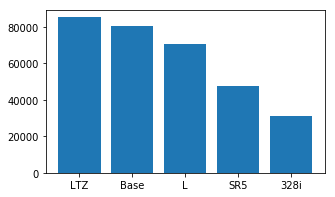

interior_color_ss
Black        110840
BLACK        101036
Jet Black     50312
Gray          38421
GRAY          33229
Name: interior_color_ss, dtype: int64


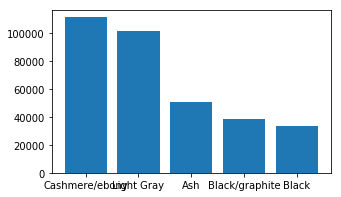

exterior_color_ss
Black           66340
White           32545
Summit White    29435
Silver          22189
Gray            21713
Name: exterior_color_ss, dtype: int64


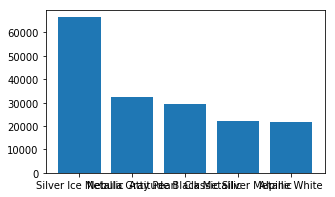

zip_is
30096    11073
27511    10512
28027    10462
37067     8588
27713     8215
Name: zip_is, dtype: int64


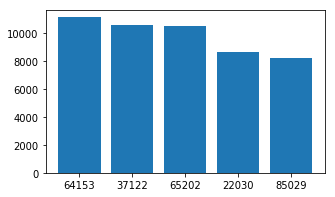

fuel_type_ss
Regular Unleaded    632800
Flex-Fuel           151234
Premium Unleaded    141344
Diesel               16932
Gasoline              3861
Name: fuel_type_ss, dtype: int64


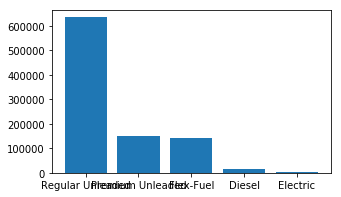

state_ss
NC    107947
FL     71808
TX     69512
CA     66758
GA     50907
Name: state_ss, dtype: int64


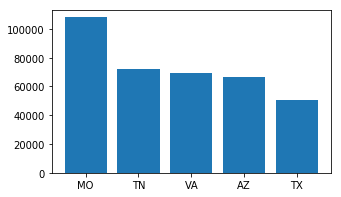

price_fs
15995    4039
16995    3929
17995    3859
19995    3699
14995    3536
Name: price_fs, dtype: int64


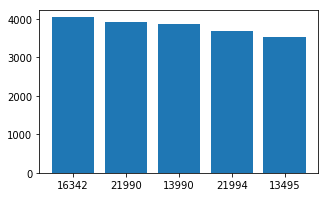

Regions
South        492201
MidWest      226154
West         137839
NorthEast     91223
Name: Regions, dtype: int64


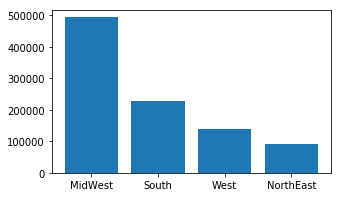

In [34]:
categories = ['make_ss', 'model_ss', 'trim_ss', 'interior_color_ss', 'exterior_color_ss', 'zip_is', 'fuel_type_ss', 'state_ss', 'price_fs', 'Regions']

for i, c in enumerate(categories):
    v = dedups[c].unique()
    
    g = dedups.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print(g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    plt.xticks(r, v)
    plt.show()

In [35]:
dedups.head()

,price_fs,miles_fs,year_is,make_ss,model_ss,trim_ss,engine_size_ss,cylinders_is,interior_color_ss,exterior_color_ss,zip_is,msrp_fs,is_certified_is,fuel_type_ss,state_ss,AGE,Regions,Population,Median Family income
0,16342,71233,2012,Chevrolet,Traverse,LTZ,3.600,6,Cashmere/ebony,Silver Ice Metallic,64153,16342,0,Regular Unleaded,MO,7,MidWest,90842,"$83,110.00"
1,21990,44637,2012,Lexus,IS 350,Base,3.500,6,Light Gray,Nebula Gray Pearl,64153,21990,1,Premium Unleaded,MO,7,MidWest,90842,"$83,110.00"
2,13990,86122,2012,Toyota,Camry,L,2.500,4,Ash,Attitude Black Metallic,64153,13990,0,Regular Unleaded,MO,7,MidWest,90842,"$83,110.00"
3,21994,71624,2012,Toyota,4Runner,SR5,4.000,6,Black/graphite,Classic Silver Metallic,64153,21994,0,Regular Unleaded,MO,7,MidWest,90842,"$83,110.00"
4,13495,73000,2012,BMW,3 Series,328i,3.000,6,Black,Alpine White,64153,13495,0,Premium Unleaded,MO,7,MidWest,90842,"$83,110.00"


# Feature Engineering

Converting categorical features into numeric values using Scikit Learn

In [36]:
labels = ['make_ss', 'model_ss', 'trim_ss', 'interior_color_ss', 'exterior_color_ss', 'zip_is', 'fuel_type_ss', 'state_ss', 'Regions']
les = {}

for l in labels:
    les[l] = LabelEncoder()
    les[l].fit(dedups[l].astype(str))
    tr = les[l].transform(dedups[l].astype(str))
    
    dedups.loc[:, l + '_feat'] = pd.Series(tr, index=dedups.index)

labeled = dedups[['price_fs'
                        ,'miles_fs'
                        ,'year_is'
                        ,'cylinders_is'
                        ,'msrp_fs'
                        , 'is_certified_is'
                        , 'engine_size_ss'
                        ,'AGE', 'Population'] 
                    + [x+"_feat" for x in labels]]

Used pearson to see how the features are related to each other and more importantly to price so that the top 10 features influencing price can be fed into the model. Looks like state and zip have very little influence on price.

In [37]:
print(labeled.head())

   price_fs  miles_fs  year_is  cylinders_is  msrp_fs  is_certified_is  \
0     16342     71233     2012             6    16342                0   
1     21990     44637     2012             6    21990                1   
2     13990     86122     2012             4    13990                0   
3     21994     71624     2012             6    21994                0   
4     13495     73000     2012             6    13495                0   

   engine_size_ss  AGE  Population  make_ss_feat  model_ss_feat  trim_ss_feat  \
0           3.600    7       90842             1            309           363   
1           3.500    7       90842             7            159           177   
2           2.500    7       90842             9             55           327   
3           4.000    7       90842             9             12           543   
4           3.000    7       90842             0              4            88   

   interior_color_ss_feat  exterior_color_ss_feat  zip_is_feat  \
0 

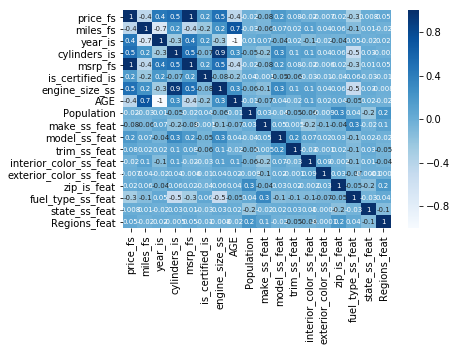

In [38]:
corr = labeled.corr(method='pearson')
sns.heatmap(corr, annot = True, fmt =".1g", annot_kws={"size": 7}, cmap = "Blues")

In [39]:
labeled.corr().loc[:,'price_fs'].abs().sort_values(ascending=False)[1:]

msrp_fs                  0.990
cylinders_is             0.508
engine_size_ss           0.497
miles_fs                 0.442
AGE                      0.441
year_is                  0.441
fuel_type_ss_feat        0.300
model_ss_feat            0.183
is_certified_is          0.166
trim_ss_feat             0.083
make_ss_feat             0.077
Regions_feat             0.051
Population               0.022
zip_is_feat              0.019
interior_color_ss_feat   0.016
state_ss_feat            0.008
exterior_color_ss_feat   0.007
Name: price_fs, dtype: float64

# Model Selection 
Used 15 most influencing features to predict price (80/20 train test split)
Dropped msrp_fs because of 1:1 corelation with price_fs; dropped year_is as it is duplicate with AGE

# Model 1 - Decision Tree (Random Forest Regressor)

In [40]:
y = labeled.price_fs

In [41]:
print (labeled.columns.tolist())

['price_fs', 'miles_fs', 'year_is', 'cylinders_is', 'msrp_fs', 'is_certified_is', 'engine_size_ss', 'AGE', 'Population', 'make_ss_feat', 'model_ss_feat', 'trim_ss_feat', 'interior_color_ss_feat', 'exterior_color_ss_feat', 'zip_is_feat', 'fuel_type_ss_feat', 'state_ss_feat', 'Regions_feat']


In [42]:
X = labeled[['miles_fs', 'cylinders_is', 'is_certified_is', 
             'engine_size_ss', 'AGE', 'Population', 'make_ss_feat', 'model_ss_feat', 'trim_ss_feat', 
             'interior_color_ss_feat', 'exterior_color_ss_feat', 'zip_is_feat', 'fuel_type_ss_feat', 
             'state_ss_feat', 'Regions_feat']]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
rf = RandomForestRegressor()

In [45]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [46]:
y_pred = rf.predict(X_test)

(array([5.8000e+01, 6.4000e+01, 1.0700e+02, 1.5600e+02, 1.9300e+02,
        3.0200e+02, 4.5400e+02, 7.2800e+02, 1.0530e+03, 1.6750e+03,
        2.8780e+03, 4.9170e+03, 8.4230e+03, 1.5709e+04, 4.0442e+04,
        7.1500e+04, 1.8082e+04, 9.5650e+03, 5.3350e+03, 2.9570e+03,
        1.7260e+03, 1.0020e+03, 6.7200e+02, 4.3200e+02, 2.7700e+02,
        1.7700e+02, 1.1400e+02, 8.4000e+01, 5.5000e+01, 4.7000e+01]),
 array([-9.98570e+03, -9.32005e+03, -8.65440e+03, -7.98875e+03,
        -7.32310e+03, -6.65745e+03, -5.99180e+03, -5.32615e+03,
        -4.66050e+03, -3.99485e+03, -3.32920e+03, -2.66355e+03,
        -1.99790e+03, -1.33225e+03, -6.66600e+02, -9.50000e-01,
         6.64700e+02,  1.33035e+03,  1.99600e+03,  2.66165e+03,
         3.32730e+03,  3.99295e+03,  4.65860e+03,  5.32425e+03,
         5.98990e+03,  6.65555e+03,  7.32120e+03,  7.98685e+03,
         8.65250e+03,  9.31815e+03,  9.98380e+03]),
 <a list of 30 Patch objects>)

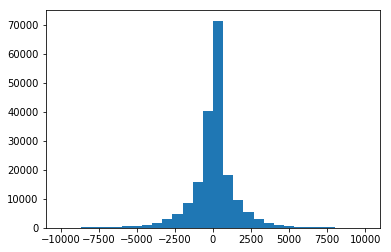

In [47]:
subsetted_data_pred = y_pred[y_test < 60000]
subsetted_data_test = y_test[y_test < 60000]

differences = subsetted_data_pred - subsetted_data_test
d = differences[(differences < 10000) & (differences > -10000)]

plt.hist(d,bins=30)

In [49]:
d.mean(), d.std()

(26.002659003051576, 1509.3462560722562)

In [50]:
explained_variance_score(y_pred, y_test)

0.9683866642063889

In [51]:
r2_score(y_pred, y_test)

0.9683816542257253

In [52]:
mean_squared_error(y_pred, y_test)

2581156.4820370143

In [53]:
from sklearn import cross_validation
cv = cross_validation.KFold(len(y_pred), n_folds=12,  random_state=30)

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [54]:
print(cv)

sklearn.cross_validation.KFold(n=189484, n_folds=12, shuffle=False, random_state=30)


In [55]:
from yellowbrick.model_selection import CVScores
from sklearn.model_selection import StratifiedKFold

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=12.
  % (min_groups, self.n_splits)), Warning)


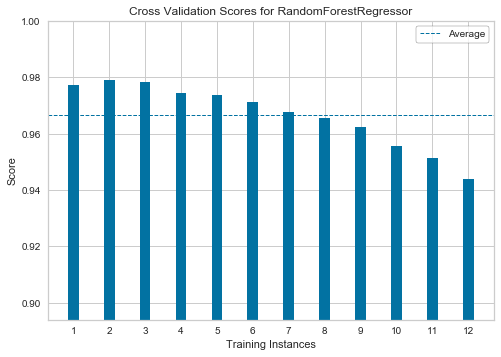

In [56]:
# Create a new figure and axes
_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(12)

# Create the cv score visualizer
oz = CVScores(
    RandomForestRegressor(), ax=ax, cv=cv, scoring='r2'
)

oz.fit(X, y)
oz.poof()

# Model 2 - Decision Tree Gradient Boost

In [57]:
gbr = GradientBoostingRegressor()

In [58]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [59]:
y_pred = gbr.predict(X_test)

(array([  570.,   800.,   972.,  1246.,  1580.,  2000.,  2669.,  3518.,
         4595.,  5793.,  7711.,  9614., 12032., 15297., 17369., 19163.,
        18469., 15894., 13013.,  9813.,  7213.,  4997.,  3783.,  2702.,
         2029.,  1501.,  1016.,   705.,   505.,   304.]),
 array([-9.99843435e+03, -9.33202781e+03, -8.66562128e+03, -7.99921475e+03,
        -7.33280822e+03, -6.66640168e+03, -5.99999515e+03, -5.33358862e+03,
        -4.66718208e+03, -4.00077555e+03, -3.33436902e+03, -2.66796248e+03,
        -2.00155595e+03, -1.33514942e+03, -6.68742884e+02, -2.33635078e+00,
         6.64070182e+02,  1.33047672e+03,  1.99688325e+03,  2.66328978e+03,
         3.32969631e+03,  3.99610285e+03,  4.66250938e+03,  5.32891591e+03,
         5.99532245e+03,  6.66172898e+03,  7.32813551e+03,  7.99454205e+03,
         8.66094858e+03,  9.32735511e+03,  9.99376165e+03]),
 <a list of 30 Patch objects>)

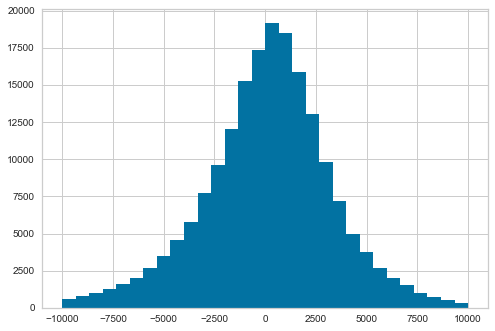

In [60]:
subsetted_data_pred = y_pred[y_test < 60000]
subsetted_data_test = y_test[y_test < 60000]

differences = subsetted_data_pred - subsetted_data_test
d = differences[(differences < 10000) & (differences > -10000)]

plt.hist(d,bins=30)

In [61]:
d.mean(), d.std()

(123.3279790139895, 3142.4567607540193)

In [62]:
r2_score(y_pred, y_test)

0.8194586458203226

In [63]:
mean_squared_error(y_pred, y_test)

11862402.673602358

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=12.
  % (min_groups, self.n_splits)), Warning)


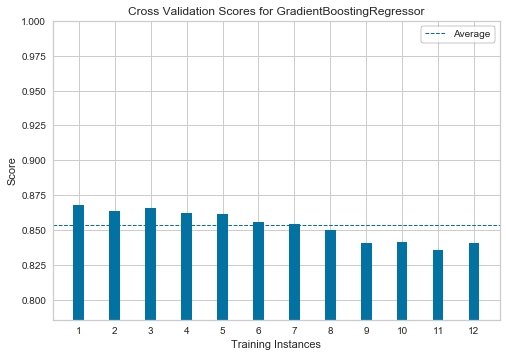

In [64]:
# Create a new figure and axes
_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(12)

# Create the cv score visualizer
oz = CVScores(
    GradientBoostingRegressor(), ax=ax, cv=cv, scoring='r2'
)

oz.fit(X, y)
oz.poof()

# Model 3 Instance Based - KNearest Regressor

In [65]:
 model = KNeighborsRegressor(n_neighbors = 5)

In [66]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [67]:
y_pred = model.predict(X_test)

In [68]:
r2_score(y_pred, y_test)

-0.6314312959628026

In [69]:
mean_squared_error(y_pred, y_test)

64878370.72610711

# Model 4 Regression - Support Vector Regression

In [92]:
from sklearn import svm

In [93]:
svr_reg = svm.SVR()

In [ ]:
svr_reg.fit(X_train, y_train)

In [ ]:
y_pred = svr_reg.predict(X_test)

In [ ]:
r2_score(y_pred, y_test)

In [ ]:
mean_squared_error(y_pred, y_test)

# Model 5 Linear Regression 

In [126]:
reg = LinearRegression(normalize=True)

In [127]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [128]:
y_pred = reg.predict(X_test)

In [129]:
r2_score(y_pred, y_test)

0.5355191368884791

In [130]:
mean_squared_error(y_pred, y_test)

26679294.823604565

# Model 6 - Ridge Regression (L2 Regularization)
Ridge assigns every feature a weight, but spreads the coefficient values out more equally, shrinking but still maintaining less predictive features.

In [79]:
clf = linear_model.Ridge(alpha=0.5)

In [80]:
clf.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [81]:
y_pred = clf.predict(X_test)

In [82]:
print(list(zip(X, clf.coef_.tolist())))

[('miles_fs', -0.07613388510978458), ('cylinders_is', 1980.308101651942), ('is_certified_is', 1905.0513909458634), ('engine_size_ss', 2602.3061167777373), ('AGE', -1185.9200650311266), ('Population', -9.136720738417963e-05), ('make_ss_feat', -55.11420097220476), ('model_ss_feat', 1.5791485210039014), ('trim_ss_feat', 0.02408988013257544), ('interior_color_ss_feat', -0.059009739630399016), ('exterior_color_ss_feat', -0.06351731529179516), ('zip_is_feat', 0.03552464549175999), ('fuel_type_ss_feat', -76.64450430985238), ('state_ss_feat', 0.42727423815379617), ('Regions_feat', 399.41305625980993)]


In [ ]:
r2_score(y_pred, y_test)

In [50]:
mean_squared_error(y_pred, y_test)

26679294.832889743

# Model 7 - LASSO (L1 Regularization)
LASSO forces weak features to have zeroes as coefficients, effectively dropping the least predictive features

In [72]:
clf_lasso = linear_model.Lasso(alpha=0.5)

In [73]:
clf_lasso.fit(X_train, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [75]:
y_pred = clf_lasso.predict(X_test)

In [76]:
print(list(zip(X, clf_lasso.coef_.tolist())))

[('miles_fs', -0.07614534346539392), ('cylinders_is', 1980.536992578208), ('is_certified_is', 1900.4918390046741), ('engine_size_ss', 2601.735936687575), ('AGE', -1185.8244889186951), ('Population', -9.129081656262214e-05), ('make_ss_feat', -55.069952158012114), ('model_ss_feat', 1.5798711962839496), ('trim_ss_feat', 0.023787372155289897), ('interior_color_ss_feat', -0.0590021151847937), ('exterior_color_ss_feat', -0.06350493157594933), ('zip_is_feat', 0.03555701418238278), ('fuel_type_ss_feat', -76.5544531169513), ('state_ss_feat', 0.4200247280548342), ('Regions_feat', 398.8258993610262)]


In [77]:
r2_score(y_pred, y_test)

0.5354522227192369

In [78]:
mean_squared_error(y_pred, y_test)

26679329.006395474

# Model 8 - Elastic Net
ElasticNet is a linear combination of L1 and L2 regularization, meaning it combines Ridge and LASSO and essentially splits the difference.

In [85]:
enr = linear_model.ElasticNet()

In [86]:
enr.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [87]:
y_pred = enr.predict(X_test)

In [88]:
print(list(zip(X, enr.coef_.tolist())))

[('miles_fs', -0.08398239821169448), ('cylinders_is', 1950.1962706154782), ('is_certified_is', 349.9610019352311), ('engine_size_ss', 1791.2143386513092), ('AGE', -1002.5472075492388), ('Population', -9.649199068098547e-05), ('make_ss_feat', -54.43755889115906), ('model_ss_feat', 4.034231054735961), ('trim_ss_feat', 0.07136315498012737), ('interior_color_ss_feat', -0.05254176750680842), ('exterior_color_ss_feat', -0.06000848186510184), ('zip_is_feat', 0.05873174149221815), ('fuel_type_ss_feat', -317.5529832208474), ('state_ss_feat', -0.4207942610264381), ('Regions_feat', 269.0060936933721)]


In [89]:
r2_score(y_pred, y_test)

0.42124284889367447

In [90]:
mean_squared_error(y_pred, y_test)

27790896.317409452